In [1]:
import sdnn

In [11]:
import importlib
importlib.reload(sdnn)

<module 'sdnn' from 'E:\\repos\\py-sDNN\\sdnn.py'>

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import style

In [4]:
style.use('fivethirtyeight')

In [5]:
def encode(data):
    y = []
    for i in data:
        if i == 0:
            y.append([0, 0, 1])
        elif i == 1:
            y.append([0, 1, 0])
        else:
            y.append([1, 0, 0])
    return np.array(y)

In [6]:
iris = datasets.load_iris()
X = preprocessing.normalize(iris.data)
y = encode(iris.target)

In [7]:
X[0], y[0]

(array([0.80377277, 0.55160877, 0.22064351, 0.0315205 ]), array([0, 0, 1]))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34)

In [12]:
nn = sdnn.DNN([4, 10, 6, 3], debug=False)

In [13]:
nn.train(X_train, y_train)

Optimization terminated successfully.
         Current function value: 33.976566
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3


In [14]:
nn.compute_accuracy(X_test, y_test)

0.3269230769230769

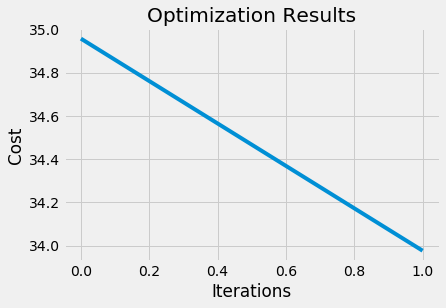

In [15]:
plt.plot(nn.J)
plt.title('Optimization Results')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [16]:
for i, j in zip(nn.y_hat, y_test):
    print(i, '---', j)

[0.35204817 0.50167324 0.14627859] --- [0 1 0]
[0.34600855 0.51061281 0.14337864] --- [0 1 0]
[0.34586075 0.46791979 0.18621946] --- [0 0 1]
[0.34188487 0.52477464 0.13334049] --- [1 0 0]
[0.34147214 0.51524165 0.14328622] --- [1 0 0]
[0.34788695 0.46746942 0.18464363] --- [0 0 1]
[0.34592957 0.50957531 0.14449512] --- [0 1 0]
[0.35186307 0.45339254 0.19474439] --- [0 0 1]
[0.34565142 0.516043   0.13830558] --- [0 1 0]
[0.35810862 0.45049388 0.1913975 ] --- [0 0 1]
[0.35099545 0.464338   0.18466655] --- [0 0 1]
[0.35157303 0.51049202 0.13793496] --- [1 0 0]
[0.34586075 0.46791979 0.18621946] --- [0 0 1]
[0.34912832 0.46431098 0.1865607 ] --- [0 0 1]
[0.35177445 0.49693725 0.1512883 ] --- [0 1 0]
[0.35379098 0.46010777 0.18610125] --- [0 0 1]
[0.34160557 0.47644837 0.18194606] --- [0 0 1]
[0.34791483 0.46700624 0.18507892] --- [0 0 1]
[0.34918707 0.51264792 0.13816501] --- [1 0 0]
[0.34785145 0.51859968 0.13354886] --- [1 0 0]
[0.35058714 0.50340641 0.14600645] --- [0 1 0]
[0.33773824 0

In [17]:
nn.compute_accuracy(X_train, y_train)

0.336734693877551

In [18]:
nn2 = sdnn.DNN([4, 20, 32, 5, 3])
nn2.train(X_train, y_train)

         Current function value: 32.222687
         Iterations: 1
         Function evaluations: 105
         Gradient evaluations: 93


In [19]:
nn2.compute_accuracy(X_test, y_test)

0.25

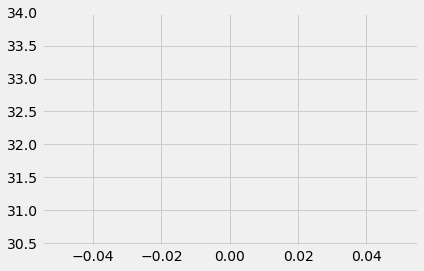

In [20]:
plt.plot(nn2.J)

In [21]:
nn3 = sdnn.DNN([4, 20, 30, 15, 3])
for b in nn3.bs:
    b.fill(0.01)
nn3.train(X_train, y_train)

Optimization terminated successfully.
         Current function value: 33.526542
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3


In [22]:
nn3.compute_accuracy(X_test, y_test)

0.25